In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('dataset.csv')

In [94]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [95]:
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [97]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [98]:
df.shape

(1002, 17)

# Treatment of Null Values

In [99]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [100]:
df.dropna(subset=['price'],inplace=True)

In [101]:
df.drop('description',axis=1,inplace=True)

In [102]:
df['engine'].fillna('unknown',inplace=True)
df['cylinders'].fillna(df['cylinders'].mean(),inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0],inplace=True)
df['mileage'].fillna(df['mileage'].mean(),inplace=True)
df['transmission'].fillna('Automatic',inplace=True)
df['trim'].fillna(df['trim'].mode()[0],inplace=True)
df['body'].fillna(df['body'].mode()[0],inplace=True)
df['doors'].fillna(4,inplace=True)
df['exterior_color'].fillna('unknown',inplace=True)
df['interior_color'].fillna('unknown',inplace=True)

In [103]:
df.head()

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Visualization

In [104]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

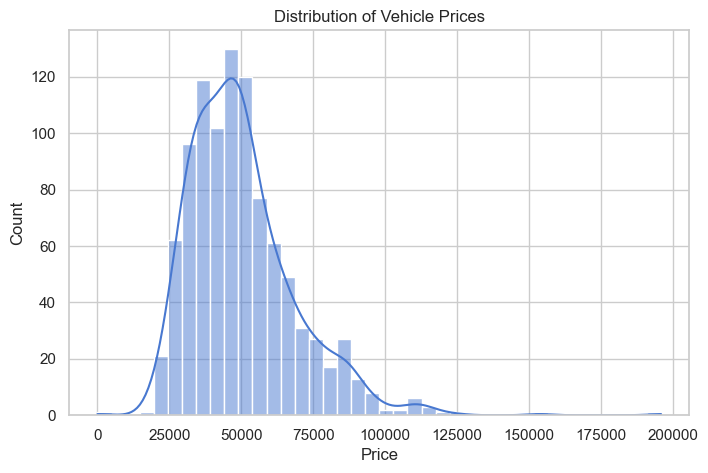

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins=40)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

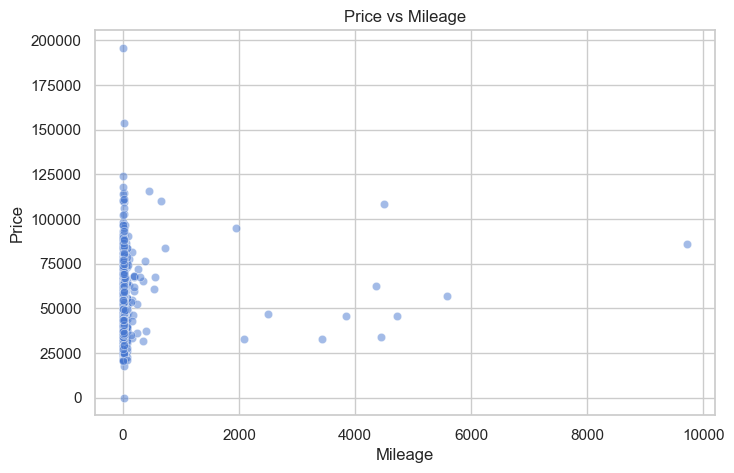

In [106]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='mileage', ylabel='price'>

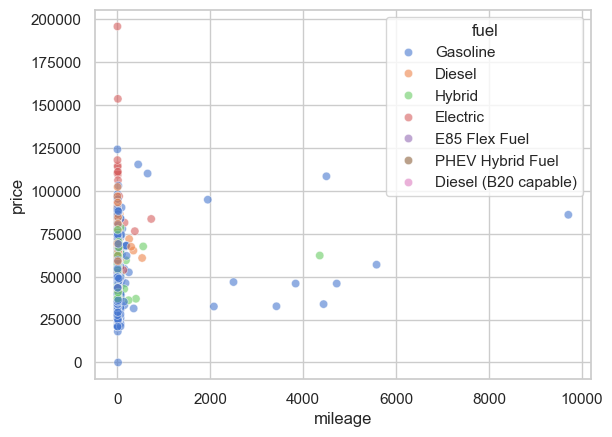

In [107]:
sns.scatterplot(x='mileage', y='price', hue='fuel', data=df, alpha=0.6)

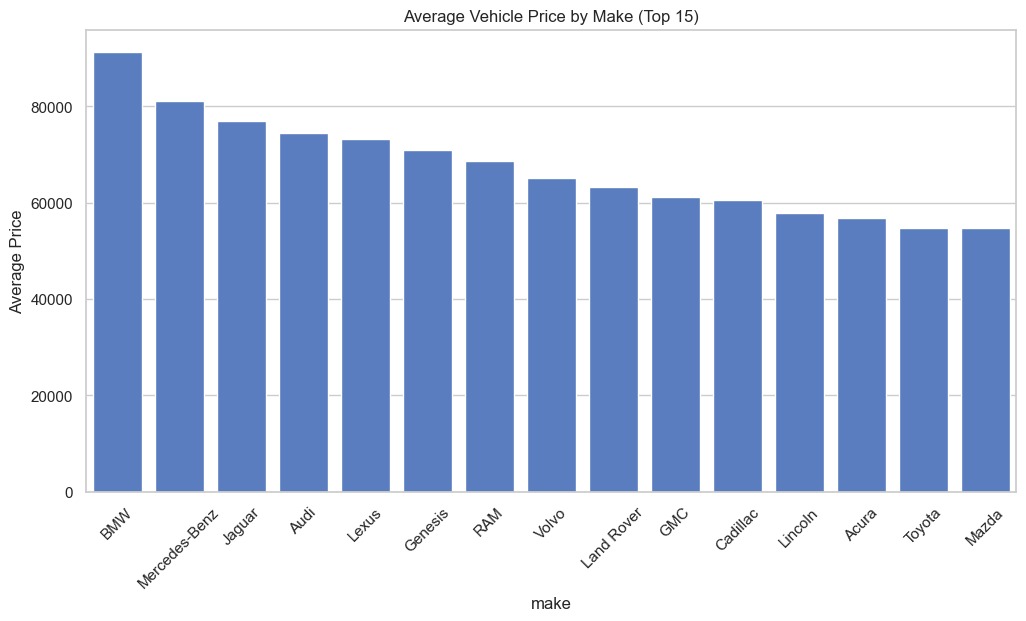

In [108]:
plt.figure(figsize=(12,6))
avg_price = df.groupby('make')['price'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title('Average Vehicle Price by Make (Top 15)')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()

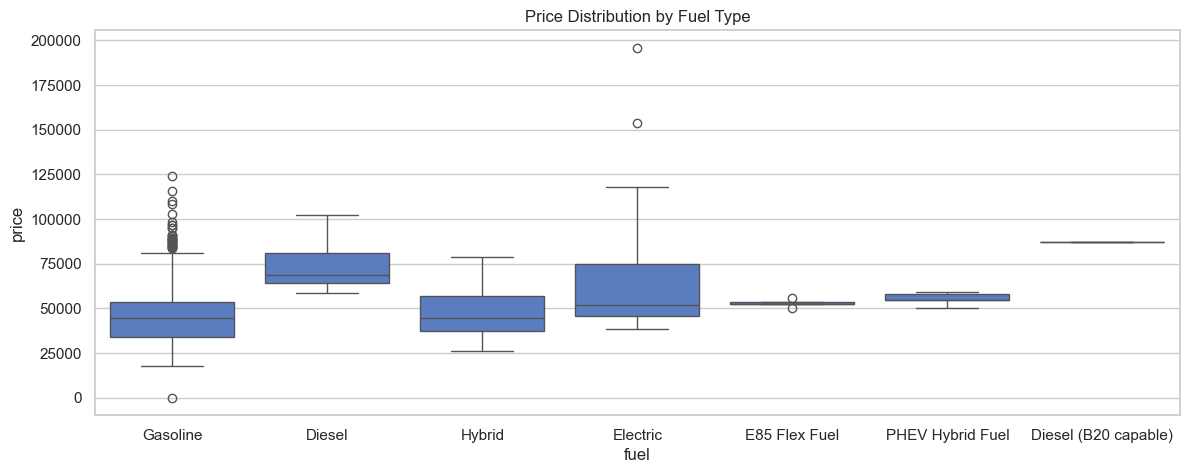

In [109]:
plt.figure(figsize=(14,5))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

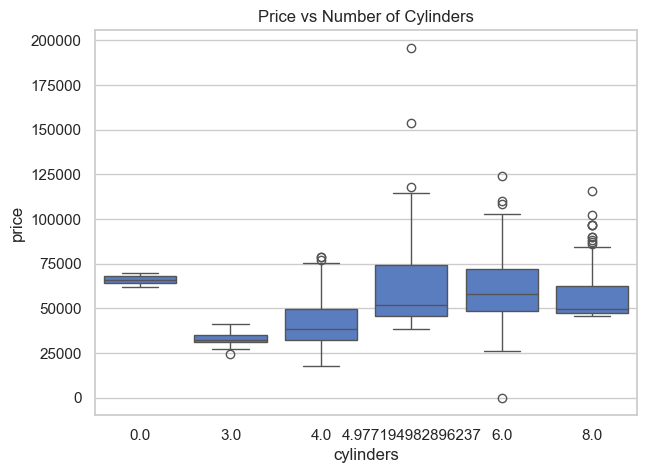

In [110]:
plt.figure(figsize=(7,5))
sns.boxplot(x='cylinders', y='price', data=df)
plt.title('Price vs Number of Cylinders')
plt.show()

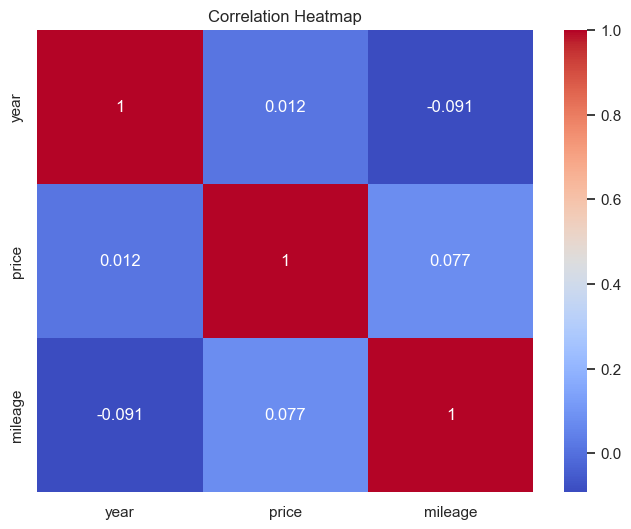

In [111]:
plt.figure(figsize=(8,6))
corr = df[['year', 'price', 'mileage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Treatment of Outliers

In [112]:
q3 = np.percentile(df['price'],75)
q1 = np.percentile(df['price'],25)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
df['price'] = df['price'].clip(lf,uf)

<Axes: ylabel='price'>

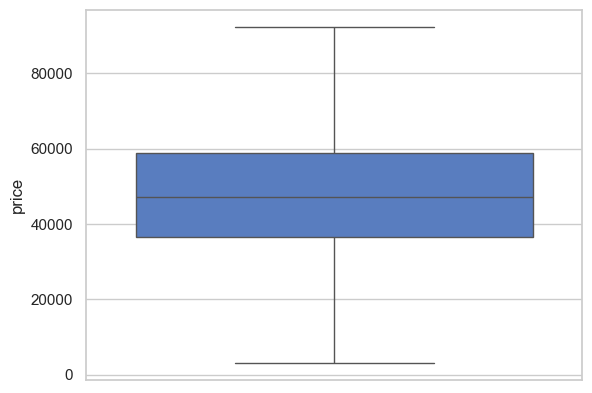

In [113]:
sns.boxplot(df['price'])

In [114]:
df['mileage'] = np.log1p(df['mileage'])

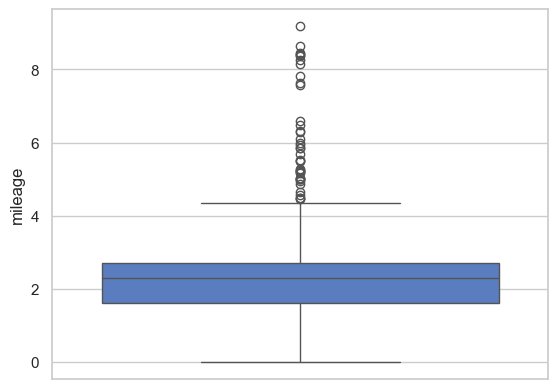

In [115]:
sns.boxplot(df['mileage'])
plt.show()

# Feature Engineering / Feature Extraction

In [116]:
df['transmission'].value_counts()

transmission
8-Speed Automatic                              312
Automatic                                      235
6-Speed Automatic                               95
1-Speed Automatic                               69
9-Speed Automatic                               59
10-Speed Automatic                              58
Automatic CVT                                   45
8-Speed Automatic with Auto-Shift               16
7-Speed DSGA? Automatic w/ 4MO                  11
8-Speed Automatic with Tiptronic                10
CVT                                              9
6-Spd Aisin F21-250 PHEV Auto Trans              7
8-speed automatic                                5
7-Speed DSG Automatic with Tiptronic             4
6-Speed Automatic Electronic with Overdrive      4
9-Speed 948TE Automatic                          4
8-Speed A/T                                      4
7-Speed Automatic with Auto-Shift                4
7-Speed Automatic S tronic                       4
Variable          

In [117]:
def simplified_transmission(x):
    x = str(x).lower()
    if 'cvt' in x:
        return 'cvt'
    elif 'dual' in x or 'dct' in x:
        return 'dual clutch'
    elif 'manual' in x or 'm/t' in x:
        return 'manual'
    elif '1-speed' in x or 'battery' in x or 'electric' in x:
        return 'single-speed (EV)'
    elif 'automatic' in x or 'a/t' in x:
        return 'automatic'
    else:
        return 'other'

df['transmission'] = df['transmission'].apply(simplified_transmission)

In [118]:
df['model'].value_counts()

model
Hornet                        61
3500                          50
Compass                       46
Durango                       39
CX-90 PHEV                    34
                              ..
C40 Recharge Pure Electric     1
Soul                           1
300                            1
AMG C 43                       1
Forte                          1
Name: count, Length: 151, dtype: int64

In [119]:
model_count = df['model'].value_counts()
rare_model = model_count[model_count<10].index
df['model'] = df['model'].replace(rare_model,'other')

In [120]:
def extraction(x):
    x = str(x).lower()
    turbo = 1 if 'turbo' in 'supercharged' in x else 0

    if 'gdi' in x or 'pdi' in x:
        fuel_sys = 'direct injection'
    elif 'mpfi' in x:
        fuel_sys = 'multipoint injection'
    elif 'ddi' in x:
        fuel_sys = 'diesel direct injection'
    else:
        fuel_sys = 'other'

    return pd.Series([turbo, fuel_sys])

df[['turbo', 'fuel_sys',]] = df['engine'].apply(extraction)

In [121]:
df.drop(['name','engine','year'],axis=1,inplace=True)

In [127]:
df.head()

,make,model,price,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,turbo,fuel_sys
0,Jeep,Wagoneer,74600.00,6.0,Gasoline,2.397895,automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,0,direct injection
1,Jeep,Grand Cherokee,50170.00,6.0,Gasoline,0.693147,automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,0,other
2,GMC,other,92398.75,8.0,Gasoline,0.000000,automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,0,other
3,Dodge,Durango,46835.00,8.0,Gasoline,3.496508,automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,0,multipoint injection
4,RAM,3500,81663.00,6.0,Diesel,2.397895,automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,0,diesel direct injection


# Applying Column Transformation


In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

cat_col = ['make','model','fuel','transmission','trim','body','exterior_color','interior_color','drivetrain','fuel_sys']
num_col = ['cylinders','mileage','doors','turbo']

preprocessor = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col),
    ('num',StandardScaler(),num_col)
])

# Spliting Data For Train and Test


In [129]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model training and evaluation

Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

linear_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [131]:
linear_model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [132]:
y_pred_linear = linear_model.predict(X_test)

In [143]:
print("MAE: ",round(mean_absolute_error(y_test,y_pred_linear),3))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred_linear)),3))
print("R2 score: ",round(r2_score(y_test,y_pred_linear),3))

MAE:  7833.891
RMSE:  12877.162
R2 score:  0.368


Ridge Regression

In [134]:
from sklearn.linear_model import RidgeCV

ridge_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RidgeCV(alphas=[0.1,1.0,10.0],cv=5))
])

In [135]:
ridge_model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [136]:
y_pred_ridge = ridge_model.predict(X_test)

In [138]:
print("Ridge best alpha value: ",ridge_model.named_steps['regressor'].alpha_)
print("MAE: ",round(mean_absolute_error(y_test,y_pred_ridge),3))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred_ridge)),3))
print("R2 score: ",round(r2_score(y_test,y_pred_ridge),3))

Ridge best alpha value:  1.0
MAE:  4448.256
RMSE:  6688.01
R2 score:  0.83


Lasso Regression

In [139]:
from sklearn.linear_model import LassoCV

lasso_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LassoCV(cv=5,random_state=42))
])

In [140]:
lasso_model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [141]:
y_pred_lasso = lasso_model.predict(X_test)

In [142]:
print("MAE: ",round(mean_absolute_error(y_test,y_pred_lasso),3))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred_lasso)),3))
print("R2 score: ",round(r2_score(y_test,y_pred_lasso),3))

MAE:  4223.428
RMSE:  6479.97
R2 score:  0.84


# Comparsion B/w Linear Vs Ridge Vs Lasso Regression

In [146]:
print("Linear Regression")
print("MAE: ",round(mean_absolute_error(y_test,y_pred_linear),3))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred_linear)),3))
print("R2 score: ",round(r2_score(y_test,y_pred_linear),3))
print()
print("Ridge Regression")
print("Ridge best alpha value: ",ridge_model.named_steps['regressor'].alpha_)
print("MAE: ",round(mean_absolute_error(y_test,y_pred_ridge),3))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred_ridge)),3))
print("R2 score: ",round(r2_score(y_test,y_pred_ridge),3))
print()
print("Lasso Regression")
print("MAE: ",round(mean_absolute_error(y_test,y_pred_lasso),3))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred_lasso)),3))
print("R2 score: ",round(r2_score(y_test,y_pred_lasso),3))

Linear Regression
MAE:  7833.891
RMSE:  12877.162
R2 score:  0.368

Ridge Regression
Ridge best alpha value:  1.0
MAE:  4448.256
RMSE:  6688.01
R2 score:  0.83

Lasso Regression
MAE:  4223.428
RMSE:  6479.97
R2 score:  0.84
